<a href="https://colab.research.google.com/github/meena25091992/Meenakshi-Hotel-Booking/blob/main/Individual_Notebook_Hotel_Booking_Analysis_EDA(Capstone_Project_1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

# Introduction :-

* This data set contains booking information for a City hotel and a Resort hotel.It includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, any special request for babies,bookings cancelled, average daily rate, meal type and the number of available parking spaces, among other things.



# **This dataset contains the following features:-**

1.  hotel  ----> City hotel and Resort hotel
2.  is_canceled   ----> check booking is canceled or not 0 for non-cancelled and 1 for canceled status.
3.  lead_time  ----> Number of days elapsed between the date of booking and date of arrival.
4.  arrival_date_year
5.  arrival_date_month
6.  arrival_date_week_number
7.  arrival_date_day_of_month
8.  stays_in_weekend_nights
9.  stays_in_week_nights
10. adults
11. children
12. babies
13. meal   ---> meal provided to the guests.4 types: SC(Self Catering) , HB(Half Board) , FB(Full Board) , BB(Bed & Breakfast).
14. country  ----> It contains the country of the origin of the customer.
15. market_segment   ----> Contains the market segment customer belongs to.
16. distribution_channel  ----> distribution channel used to make the bookings.
17. is_repeated_guest  ----> contains value indicating if the guest has had the stay at same hotel (1) before or not(0) 
18. previous_cancellations
19. previous_bookings_not_canceled
20. reserved_room_type
21. assigned_room_type
22. booking_changes
23. deposit_type
24. agent
25. company
26. days_in_waiting_list  ----> contains the number of days spent by customer on waiting list
27. customer_type
28. adr ----> average daily rate(Cost of booking per day)
29. required_car_parking_spaces
30. total_of_special_requests  ----> contains the total number of special request or any special services needed by guest when they are travelling with a child or baby.
31. reservation_status
32. reservation_status_date





In [11]:
#  import all required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (13,7) # It is used to set the graph size
from warnings import filterwarnings
filterwarnings('ignore')

In [12]:
#  mounting google drive to load our dataset

from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [13]:
#  link the dataset path and read csv file

working_directory = '/content/drive/MyDrive/Meenakshi_First_Capestone_Project_EDA/'
hotel_df = pd.read_csv(working_directory + 'Hotel Bookings.csv') 

In [14]:
hotel_df.shape   #  geting the total no. of rows and columns by using "shape" method of our dataframe

(119390, 32)

In [15]:
hotel_df.info()  #  getting information about the datatypes and null values stored at each column by using "info()" method

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [16]:
hotel_df.columns  #  getting the names of all the columns in our dataset

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [17]:
hotel_df.head()  #  fetch first five rows by using head() method of dataframe

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03




* **Make the copy of the dataframe so that we can do all the analysis on the copy of dataframe and original dataframe will remain unchanged and unaffected.**



In [18]:
#  Copy the original datframe into the new dataframe by using "copy()" method of dataframe
hotel_booking_df =hotel_df.copy()



* **In our dataframe, We have many columns which is having null values and have duplicate data.So, we need to remove that data and clean our dataframe.**





# Data Cleaning : removing null and duplicate data 



* **In our dataframe, We have many columns which is having null values and duplicate data.So, we need to remove that data and clean our dataframe.**





In [19]:
#  dropping the unnecessary columns by using drop() method of dataframe
#  assigning it to dataframe variable itself 

hotel_booking_df = hotel_booking_df.drop(columns=['agent','company','reservation_status_date']) 
hotel_booking_df.shape

(119390, 29)



* **Now, there are 29 columns left in our dataframe.**



In [20]:
#  check if there is any duplicate rows or not by using duplicated() method of dataframe

duplicate_rows_df = hotel_booking_df[hotel_booking_df.duplicated()]
print(f"The number of duplicate rows is : {duplicate_rows_df.shape}") # printing total number of duplicate rows in our dataframe

The number of duplicate rows is : (32267, 29)


In [21]:
#  count number of rows in each  by "count()" method of dataframe

hotel_booking_df.count()

hotel                             119390
is_canceled                       119390
lead_time                         119390
arrival_date_year                 119390
arrival_date_month                119390
arrival_date_week_number          119390
arrival_date_day_of_month         119390
stays_in_weekend_nights           119390
stays_in_week_nights              119390
adults                            119390
children                          119386
babies                            119390
meal                              119390
country                           118902
market_segment                    119390
distribution_channel              119390
is_repeated_guest                 119390
previous_cancellations            119390
previous_bookings_not_canceled    119390
reserved_room_type                119390
assigned_room_type                119390
booking_changes                   119390
deposit_type                      119390
days_in_waiting_list              119390
customer_type   






 
* **Some rows have less data as compared to other rows.It means that there is lots of duplicate data in rows.So,we need to remove it to reduce our dataset.It helps in analysing and visualizing the dataset more efficiently and clearly.**






In [22]:
#  drop duplicate rows by using "drop_duplicates()" method of dataframe
hotel_booking_df = hotel_booking_df.drop_duplicates()
hotel_booking_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out


In [23]:
#  Now, Use count method again to count no. of rows left for each column after removing duplicate rows 

hotel_booking_df.count()

hotel                             87123
is_canceled                       87123
lead_time                         87123
arrival_date_year                 87123
arrival_date_month                87123
arrival_date_week_number          87123
arrival_date_day_of_month         87123
stays_in_weekend_nights           87123
stays_in_week_nights              87123
adults                            87123
children                          87119
babies                            87123
meal                              87123
country                           86672
market_segment                    87123
distribution_channel              87123
is_repeated_guest                 87123
previous_cancellations            87123
previous_bookings_not_canceled    87123
reserved_room_type                87123
assigned_room_type                87123
booking_changes                   87123
deposit_type                      87123
days_in_waiting_list              87123
customer_type                     87123


* **So, We have seen that there is lots of duplicate data in our dataframe.It is beneficial to remove it to make dataset more undertsandable and clear.** 

In [24]:
#  now finding null values in dataframe 
#  use isnull() to check null values and sum() method to find total number of null values at each column of dataframe

print(hotel_booking_df.isnull().sum())

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            4
babies                              0
meal                                0
country                           451
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
days_in_waiting_list                0
customer_type                       0
adr                                 0
required_car

* **As, We have seen that there are 4 null values in children column and 451 null values in country column**

In [25]:
#  dropping the null values by using "dropna()" method

hotel_booking_df = hotel_booking_df.dropna()
hotel_booking_df.count()   # again check no. of rows left in each column after dropping null values

hotel                             86668
is_canceled                       86668
lead_time                         86668
arrival_date_year                 86668
arrival_date_month                86668
arrival_date_week_number          86668
arrival_date_day_of_month         86668
stays_in_weekend_nights           86668
stays_in_week_nights              86668
adults                            86668
children                          86668
babies                            86668
meal                              86668
country                           86668
market_segment                    86668
distribution_channel              86668
is_repeated_guest                 86668
previous_cancellations            86668
previous_bookings_not_canceled    86668
reserved_room_type                86668
assigned_room_type                86668
booking_changes                   86668
deposit_type                      86668
days_in_waiting_list              86668
customer_type                     86668




* **Null values,duplicate data is removed from the dataframe.**


*  **Dataframe is now free from noisy data.**





In [26]:
#  now check is their any null value left or not

print(hotel_booking_df.isnull().sum())


hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

**We have seen that no null values are left.**



# **Working on outliers**





*  **Outliers is an abnormally large or small value in the dataset which may lead to some noise in the data.**


*  **In general ,we try to avoid or remove these outliers from the dataset to make our dataset normal and it is easy for analysis.**







(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18]), <a list of 18 Text major ticklabel objects>)

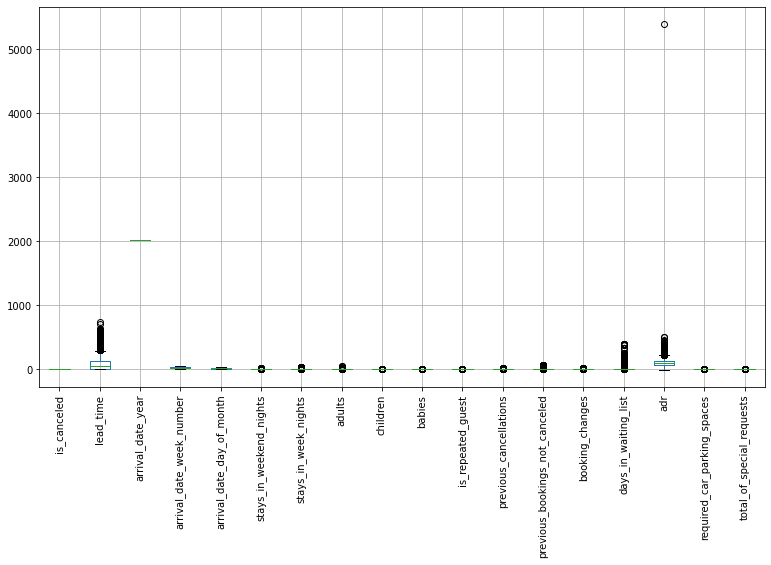

In [27]:
#  draw box plot to see if there is any outliers in our dataset

hotel_booking_df.boxplot()
plt.xticks(rotation=90) #  rotate each value at x-axis to 90 degree angle




*   **From this above graph, it is clear that the column  lead_time and adr have outliers.**



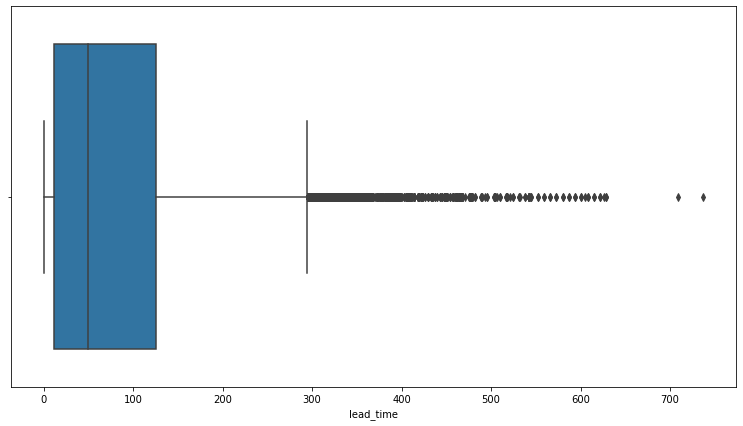

In [28]:
#  plotting box plot to find outliers for column : lead time 

sns.boxplot(x=hotel_booking_df['lead_time'])

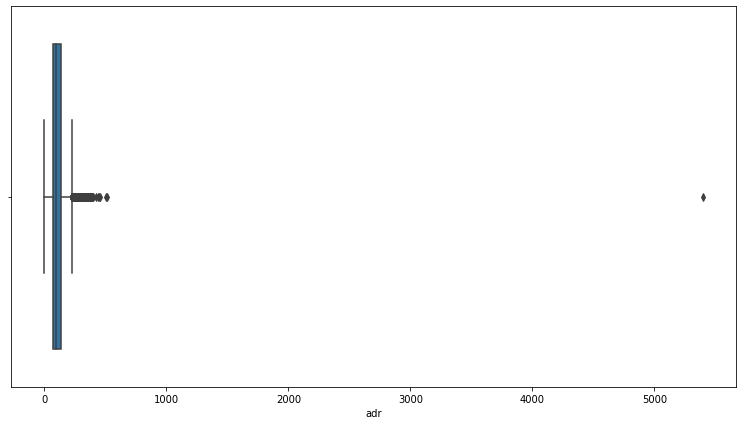

In [29]:
#  plotting box plot to find outliers  for column : adr(avergae daily rate)

sns.boxplot(x=hotel_booking_df['adr'])

In [30]:
#  check the shape of our dataframe before removing the outliers

print(f"Old shape : {hotel_booking_df.shape}")

Old shape : (86668, 29)


In [31]:
#  dropping outliers for columns which have outliers in our dataframe

cols = ['lead_time' , 'adr'] # creating list for columns having outliers
Q1 = hotel_booking_df[cols].quantile(0.25)  #  lower range
Q3 = hotel_booking_df[cols].quantile(0.75)  #  upper range

IQR = Q3 - Q1 # interquartile range

# using interquartile range to find outliers in the data and remove them
hotel_booking_df = hotel_booking_df[~((hotel_booking_df[cols] < (Q1 - 1.5 * IQR)) |(hotel_booking_df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [32]:
#  after removing outliers the shape of our dataframe has been changed

print(f"New shape : {hotel_booking_df.shape}")

New shape : (81765, 29)


In [33]:
#  Analysis the data by looking into various columns i.e. max. ,min., mean etc.
hotel_booking_df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,81765.000000,81765.000000,81765.000000,81765.000000,81765.000000,81765.000000,81765.000000,81765.000000,81765.000000,81765.000000,81765.000000,81765.000000,81765.000000,81765.000000,81765.000000,81765.000000,81765.000000,81765.000000
mean,0.265272,72.349477,2016.193738,26.618675,15.808414,0.993628,2.583000,1.864954,0.118376,0.010506,0.040996,0.030245,0.186180,0.263780,0.588553,102.291585,0.082713,0.697242
std,0.441481,73.349971,0.685823,13.873239,8.845727,1.019259,2.019346,0.507909,0.417284,0.112454,0.198281,0.378541,1.766758,0.713793,7.990648,45.236940,0.279373,0.826745
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,11.000000,2016.000000,15.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,72.000000,0.000000,0.000000
50%,0.000000,47.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,97.200000,0.000000,0.000000
75%,1.000000,117.000000,2017.000000,37.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,130.500000,0.000000,1.000000
max,1.000000,294.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,4.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,259.000000,226.840000,8.000000,5.000000


# Visualize total  number of bookings for both hotels

In [34]:
#  total booking counts for each hotel
hotel_booking_df['hotel'].value_counts(normalize=True)

City Hotel      0.626686
Resort Hotel    0.373314
Name: hotel, dtype: float64

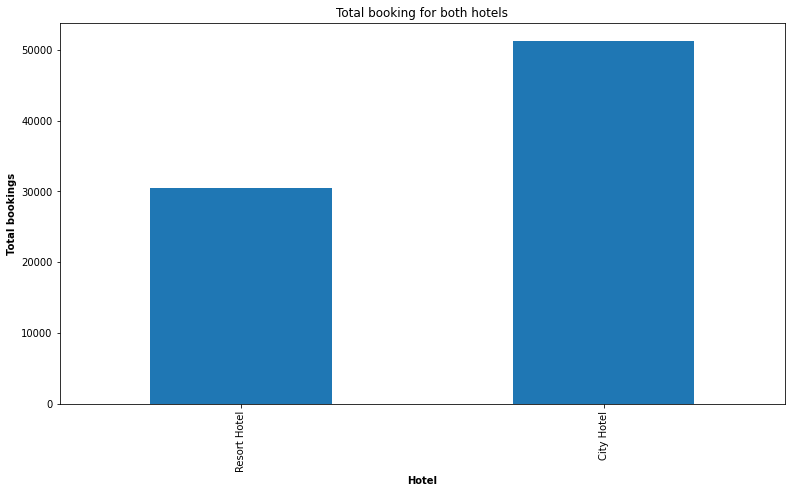

In [35]:
#  creating the bar plot
#  use "value_counts()" method on "hotel" column to find total bookings
#  using plot() method having (kind="bar") as parameter to plot (bar graph)

hotel_booking_df.hotel.value_counts().sort_values().plot(kind = 'bar')
plt.xlabel("Hotel" , weight="bold")  #  label at x-axix
plt.ylabel("Total bookings" , weight="bold")  #  label at y-axis
plt.title("Total booking for both hotels")  #  title to reperesent graph significance

#  to show a graph.It is necessary when you are using Matplotlib in terminal and optional when you are using notebook
plt.show()



* **It has been clearly seen from the above graph that City Hotel have highest bookings.**
* **It is preferred by most of the customers.**
* **We can also say that City Hotel have been liked my most of the customers.**



# To better understand the dataset, I have a list of questions to analyse it further:


1.  Which is the busiest month for both hotels? Which is the most occupied month for City Hotel and Resory Hotel?
2.  What is the percentage of cancelled and non-cancelled bookings? Which type of hotel is more likely to be cancelled?
3.  What is the total number of bookings by market segments?
4.  Total Nights Spent by Guests at the Hotel by Market Segment and Hotel Type.
5. Which was the most booked accommodation type (Single, Couple, Family)?
6.  How does the Price Per Night (ADR) Vary Over the Year by Hotel Type?
7. What is the percentage of booking for each year?
8. What is the Effect of Meal type on Cancellations?

# Sorting month column according to month category so that we are able to visualize in a better way.

In [36]:
#  sort arrival month column by monthwise so that we get graph according to monthwise
ordered_months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

#  use "Categorical()" method of pandas to order "arrival_date_month" column monthwise
hotel_booking_df['arrival_date_month'] = pd.Categorical(hotel_booking_df['arrival_date_month'], categories=ordered_months, ordered=True)

# 1. Which is the busiest month for both hotels? Which is the most occupied month for City Hotel and Resort Hotel?

In [37]:
#  use value_counts to find the total bookings of both hotels together monthwise
#  reset_index() is used to set the index for new created dataframe from value_counts data
#  values is used to set the values at proper
#  columns parameter is used to set the column names for new dataframe

total_bookings_df = pd.DataFrame(hotel_booking_df['arrival_date_month'].value_counts().reset_index().values,columns=['month','bookings']) 
total_bookings_df

,month,bookings
0,August,9478
1,July,9045
2,May,7860
3,April,7686
4,March,7360
5,June,7229
6,October,6529
7,September,6184
8,February,5982
9,December,4938


Text(0, 0.5, 'Bookings')

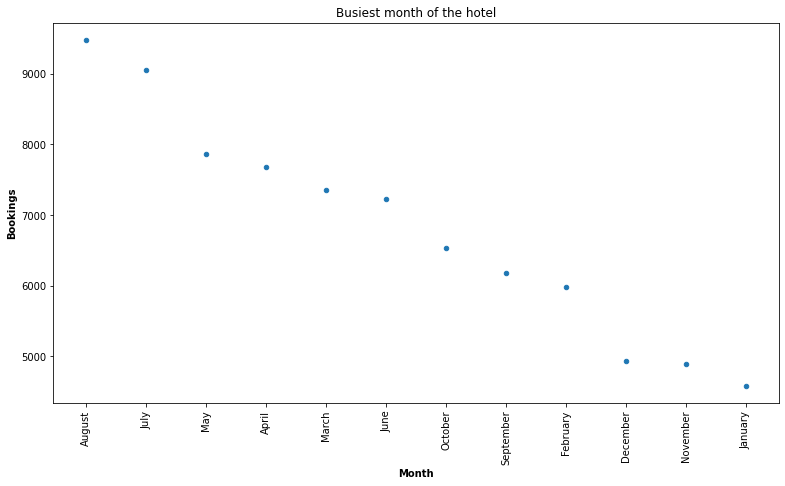

In [38]:
#  plot scatter graph to show bussiest month 
total_bookings_df.plot.scatter(x='month',y='bookings')
plt.title("Busiest month of the hotel")
plt.xlabel("Month",weight="bold")
plt.xticks(rotation=90)
plt.ylabel("Bookings",weight="bold")


In [39]:
#  use groupby to find the total bookings for each hotel at every month
#  apply groupby on "arrival_date_month" column and count total bookings for both hotel 
#  using "value_counts" method on "hotel" column

hotel_booking_df.groupby('arrival_date_month')['hotel'].value_counts().reset_index(name="count_monthwise") 

,arrival_date_month,hotel,count_monthwise
0,January,City Hotel,2688
1,January,Resort Hotel,1898
2,February,City Hotel,3563
3,February,Resort Hotel,2419
4,March,City Hotel,4793
5,March,Resort Hotel,2567
6,April,City Hotel,4925
7,April,Resort Hotel,2761
8,May,City Hotel,5083
9,May,Resort Hotel,2777


Text(0.5, 1.0, 'Showing Monthly Bookings By Heat Map')

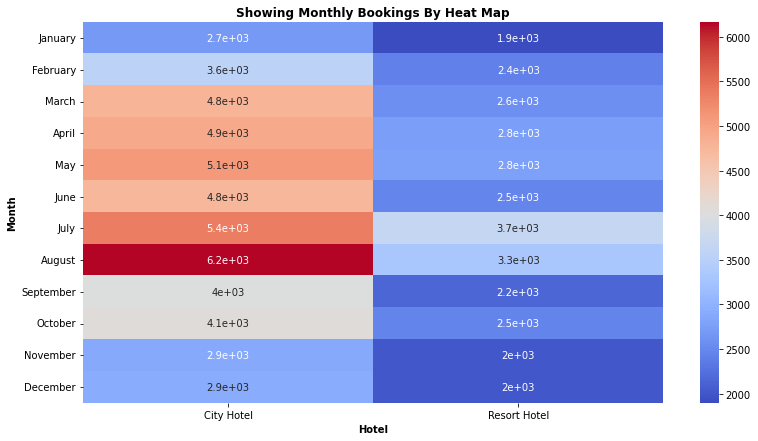

In [40]:
#  plot the heatmap to show the busiest month for both hotel: City and Resort Hotel
#  using seaborn library to plot heatmap
#  using crosstab method of dataframe to represent the data in tabular form and easy to represent it on a heatmap
# cmap parameter is used for different colors patterns on heatmap 

sns.heatmap(pd.crosstab(hotel_booking_df.arrival_date_month,hotel_booking_df.hotel) , cmap='coolwarm' , annot=True) 
plt.xlabel("Hotel",weight='bold')
plt.ylabel("Month",weight='bold')
plt.title("Showing Monthly Bookings By Heat Map",weight='bold')


Text(0.5, 1.0, 'Monthwise bookings')

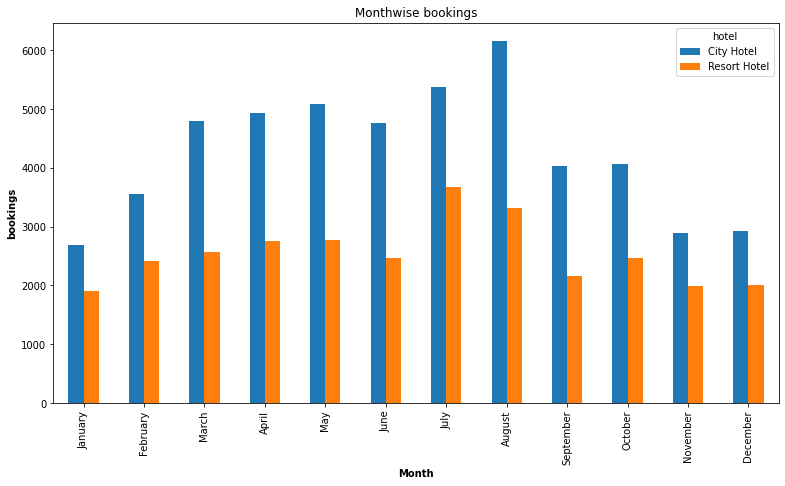

In [41]:
#  apply groupby on two columns and use size method to count the number of entries/rows 
month_busiest_df = hotel_booking_df.groupby(['arrival_date_month','hotel']).size()

#  unstack method works with the MultiIndex objects in DataFrame
#  It producing a reshaped DataFrame with a new inner-most level of column labels.
month_busiest_df = month_busiest_df.unstack()

#  plot bar graph to show bookings per month for each hotel 
month_busiest_df.plot(kind='bar')
plt.xlabel("Month" , weight="bold")
plt.ylabel("bookings" , weight="bold")
plt.title("Monthwise bookings")

# Conclusion drawn:

*   From the above scatter graph,I have analyzed that August is the busiest month of the hotels followed by July and May.Also,January and November have least number of bookings.

*   From the above heat map and bar graph ,I concluded that August is the busiest month for City hotel followed by July and May.Also,July seems to be the busiest month for Resort Hotel followed by August and May.

*  It has been clearly seen from the bar graph that in both City and Resort hotel,the least number of bookings is in the month of November,December and January.I think due to winter season bookings are very less in these months.

* I think because of summer vacations in the month of May , July, August bookings are highest in these months.

* I think because of winter season the least bookings were made at the start and end of the year.






# 2. What is the percentage of cancelled and non-cancelled bookings? Which type of hotel is more likely to be cancelled?

 *    **Below is the code to reperesent the proportion of cancelled and not cancelled bookings by pie chart**

In [42]:
# code to find out the number of cancelled and non-cancellaed bookings for both hotels
# value_counts method is used to count the total number of cancelled and non-cancelled bookings
# normalize is set to True i.e. getting percentage count which is sometimes better than normal count for analysis

cancel_vs_not_cancelled_df = hotel_booking_df['is_canceled'].value_counts(normalize = True)
cancel_vs_not_cancelled_df

0    0.734728
1    0.265272
Name: is_canceled, dtype: float64

Text(0, 0.5, 'Non-Cancelled')

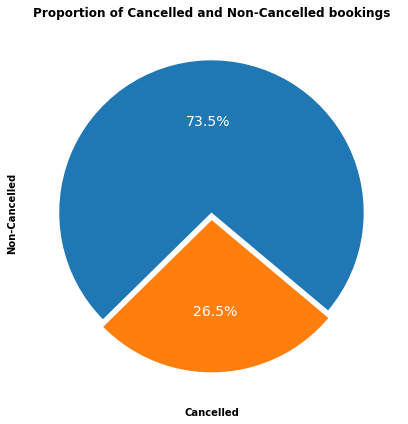

In [43]:
#  draw pie chart for canceled and non-canceled bookings
#  A wedge of a pie chart can be made to explode from the rest of the wedges of the pie chart using the explode parameter of the pie function.

explode = (0, 0.05)

#  startangle parameter is used to rotatate a pie chart by various angles
#  autopct parameter enables you to display the percent value using Python string formatting  
#  textprops parameter is used to change color and fontsize of values inside pie chart

plt.pie(cancel_vs_not_cancelled_df,startangle = 320,explode=explode, autopct='%1.1f%%' , textprops={'color':"w",'fontsize':14})
plt.title('Proportion of Cancelled and Non-Cancelled bookings', weight='bold')  #  title to represent graph objective 
plt.xlabel("Cancelled", weight='bold') #  label at x-axis with font style as bold
plt.ylabel("Non-Cancelled", weight='bold') #  label at y-axis with font style as bold


* **Below is the code to check the number of bokings cancelled for both City hotel and Resort Hotel**

In [44]:
# count the total number of cancelled and non-cancelled bookings for City hotel and Resort hotel
# apply groupby on "is_canceled" column to find the total enteries of each hotel type 
# normalize is set to True i.e. getting percentage count 

hotel_booking_df.groupby('is_canceled')['hotel'].value_counts(normalize = True)


is_canceled  hotel       
0            City Hotel      0.604378
             Resort Hotel    0.395622
1            City Hotel      0.688474
             Resort Hotel    0.311526
Name: hotel, dtype: float64

Text(0.5, 0, 'Cancelation status')

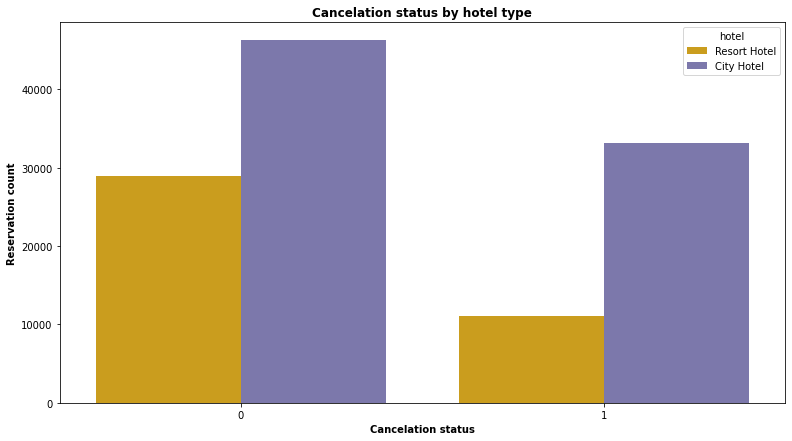

In [45]:
#  plot the count plot of seaborn library for the total number of bookings cancelled  and non-cancelled by City hotel and Resort hotel
#  palette parameter is used for different color patterns
#  hue parameter represents which column in the data frame, you want to use for color encoding.

sns.countplot(x= 'is_canceled',data = hotel_df,hue = 'hotel',palette= 'Dark2_r')
plt.title('Cancelation status by hotel type',weight='bold') #  title to represent graph objective
plt.ylabel('Reservation count', weight='bold') #  label at y-axis with font style as bold
plt.xlabel('Cancelation status',weight='bold') #  label at x-axis with font style as bold


# Conclusion Drawn:

*  The above pie chart depicts proportion or percentage of cancelled & Not cancelled bookings.
*  According to the pie chart, 73.5% bookings were not cancelled and 26.5% of the bookings were cancelled at the Hotel.
* According to the count plot, a total of 31.46% Bookings were cancelled at the Resort  and a total of 68.5% Bookings were cancelled at the City Hotel
* We found that City Hotel is having highest number of cancelled bookings.It also have highest number of bookings.


#3. What is the total number of bookings by Market Segment?

In [46]:
# use value_counts to check which market segment have highest bookings
hotel_booking_df['market_segment'].value_counts(normalize=True)
                                               

Online TA        0.596172
Offline TA/TO    0.159799
Direct           0.133138
Groups           0.050670
Corporate        0.048945
Complementary    0.008500
Aviation         0.002776
Name: market_segment, dtype: float64

Text(0, 0.5, ' Segment Count')

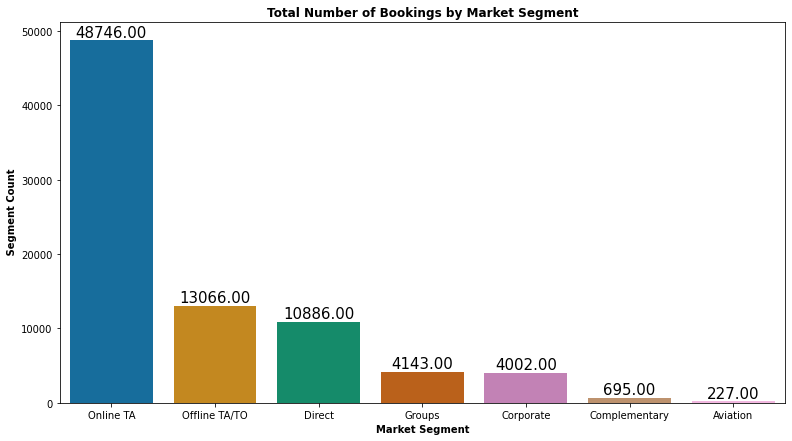

In [47]:
#  plot countplot graph of seaborn library
#  order parameter is used to plot graph values in sorted order according to counted values
#  palette is used for different color patterns

plots = sns.countplot(x=hotel_booking_df['market_segment'],order=pd.value_counts(hotel_booking_df['market_segment']).index, palette='colorblind')

# below is the code to annotate bars i.e. write values on top of each bar 

#  Iterrating over the bars one-by-one
for bar in plots.patches:
   
  #  Using Matplotlib's annotate function and
  #  passing the coordinates where the annotation shall be done
  #  Annotation means adding notes to a diagram stating what values do it represents. 
  #  It often gets tiresome for the user to read the values from the graph when the graph is scaled down 
  #  or is overly populated
  #  x-coordinate: bar.get_x() + bar.get_width() / 2
  #  y-coordinate: bar.get_height()
  #  free space to be left to make graph pleasing: (0, 8)
  #  ha and va stand for the horizontal and vertical alignment
  
     plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
    
plt.title('Total Number of Bookings by Market Segment', weight='bold')  #  title to represent graph objective
plt.xlabel('Market Segment', weight='bold')  #  label at x-axis with font style as bold
plt.ylabel(' Segment Count' , weight='bold') #  label at y-axis with font style as bold

# Conclusion drawn:

*  The above graph depicts that around 60 % of bookings are made via Online Travel Agents. 

*  Around 15 % of bookings are made via Offline Travel Agents.

*   Online Travelling Agent is the market segment which is having highest number of bookings. 

*   Complementary and Aviation market segment have least number of bookings.






# 4. Total Nights Spent by Guests at the Hotel by Market Segment and Hotel Type

In [48]:
#  finding total number of night spent by customers in Resort and City Hotel according to their repective Market Segment
#  add columns 'stays_in_week_nights' and 'stays_in_weekend_nights' to find the total number of night stay 
#  store the add result of both columns in a new column of dataframe named as "total_nights_stay"

hotel_booking_df['total_nights_stay'] = hotel_booking_df['stays_in_week_nights'] + hotel_booking_df['stays_in_weekend_nights']


In [49]:
hotel_booking_df.tail() # find last five records and check whether new column "total_night_stays" is create in our df or not

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_nights_stay
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,96.14,0,0,Check-Out,7
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,0,Transient,225.43,0,2,Check-Out,7
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,0,Transient,157.71,0,4,Check-Out,7
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,104.40,0,0,Check-Out,7
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,151.20,0,2,Check-Out,9


Text(0, 0.5, 'Number of Days')

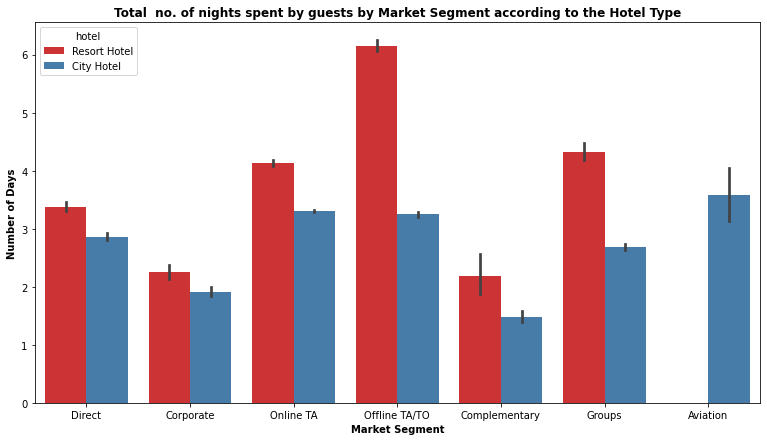

In [50]:
#  plot the barplot using seaborn library
#  x and y are columns to be plot on graph 
#  data is name of dataframe 
#  hue parameter represents which column in the data frame, you want to use for color encoding.
#  palette parameter is used for different color patterns

sns.barplot(x = "market_segment", y = "total_nights_stay", data = hotel_booking_df, hue = "hotel", palette = 'Set1')
plt.title('Total  no. of nights spent by guests by Market Segment according to the Hotel Type', weight='bold')  #  set title
plt.xlabel('Market Segment',weight='bold')  #  set label at x_axis with bold as fontstyle
plt.ylabel('Number of Days',weight='bold')  #  set label at y_axis with bold as fontstyle



#Conclusion drawn:

*   For City hotel, most of customers prefers to stay between 1-4 nights.

*   For Resort hotel,most of customers prefers to stay for more than 3 nights.

*  Guest from aviation segment do not prefer to stay at Resort hotel.

*  Customers from Offline Travelling Agents are prefer to stay more nights at the Resort hotel.





#5. Which was the most booked accommodation type (Single, Couple, Family)?

In [51]:
#  Select single, couple and family  with kids from the dataframe

#  use (if) conditional statment to fecth dataset accroding to the following criteria:
#    if adults = 1 and children = 0 and babies = 0 ,then a customer is a single person
#    if adults = 2 and children = 0 and babies = 0 ,then a customer is a couple
#    if  sum of (adults + children + babies) > 2 ,then a customer is a family with children or babies

single   = hotel_booking_df[(hotel_booking_df.adults==1) & (hotel_booking_df.children==0) & (hotel_booking_df.babies==0)]
couple   = hotel_booking_df[(hotel_booking_df.adults==2) & (hotel_booking_df.children==0) & (hotel_booking_df.babies==0)]
family   = hotel_booking_df[ (hotel_booking_df.adults + hotel_booking_df.children + hotel_booking_df.babies) > 2]


#  Make the list of Category names, and their total percentage
names = ['Single', 'Couple (No Children)', 'Family']   #  list of category to represent in x-axis in graph

#  shape[0] will display the number of rows/entries in each category : single , couple and family
count_data = [single.shape[0],couple.shape[0], family.shape[0]]  #  list of shape of each category

#  find the percentage for each category to represent in y-axis on graph
count_percent = [each_category/hotel_booking_df.shape[0]*100 for each_category in count_data]





Text(0, 0.5, 'Booking Count Percent(%)')

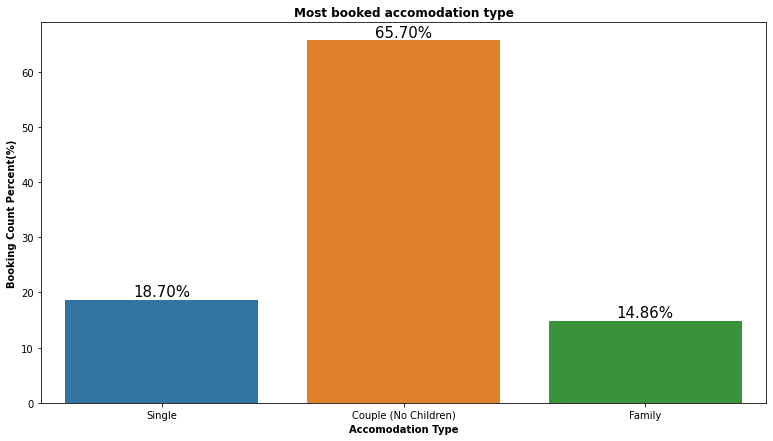

In [52]:
# plot the bar plot of seaborn library to represent the categories of customers
plots = sns.barplot(names,count_percent)

# below is the code to annotate bars i.e. write values on top of each bar 

#  Iterrating over the bars one-by-one

for bar in plots.patches:
   
  #  Using Matplotlib's annotate function and
  #  passing the coordinates where the annotation shall be done
  #  Annotation means adding notes to a diagram stating what values do it represents. 
  #  It often gets tiresome for the user to read the values from the graph when the graph is scaled down 
  #  or is overly populated
  #  x-coordinate: bar.get_x() + bar.get_width() / 2
  #  y-coordinate: bar.get_height()
  #  free space to be left to make graph pleasing: (0, 8)
  #  ha and va stand for the horizontal and vertical alignment
     plots.annotate(format(bar.get_height(), '.2f') + '%' ,
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
    
plt.title('Most booked accomodation type', weight='bold')  #  title to represent graph objective
plt.xlabel('Accomodation Type', weight='bold')  #  label at x-axis with font style as bold
plt.ylabel('Booking Count Percent(%)' , weight='bold') #  label at y-axis with font style as bold


# Conclusion drawn:

*   Couples have highest accomdation as compares to other categories.
*   Family have least accomdation.
*  Around 65% of bookings has been occupied by couples.
*  Only 15% of bookings has been occupied by famililes.




#6.How does the Price Per Night (ADR) Vary Over the Year by Hotel Type? 

In [53]:
#  apply groupby on the column arrival_date_month and hotel to find the mean of adr(average daily rate) to find the change in adr monthly  
#  represent whole year by monthly adr for the respective hotel 
#  round() method is used to round a number to a given precision in decimal digits.
hotel_booking_df.groupby(['arrival_date_month','hotel'])['adr'].mean().round().reset_index()


,arrival_date_month,hotel,adr
0,January,City Hotel,85.0
1,January,Resort Hotel,49.0
2,February,City Hotel,88.0
3,February,Resort Hotel,54.0
4,March,City Hotel,93.0
5,March,Resort Hotel,58.0
6,April,City Hotel,115.0
7,April,Resort Hotel,79.0
8,May,City Hotel,126.0
9,May,Resort Hotel,81.0


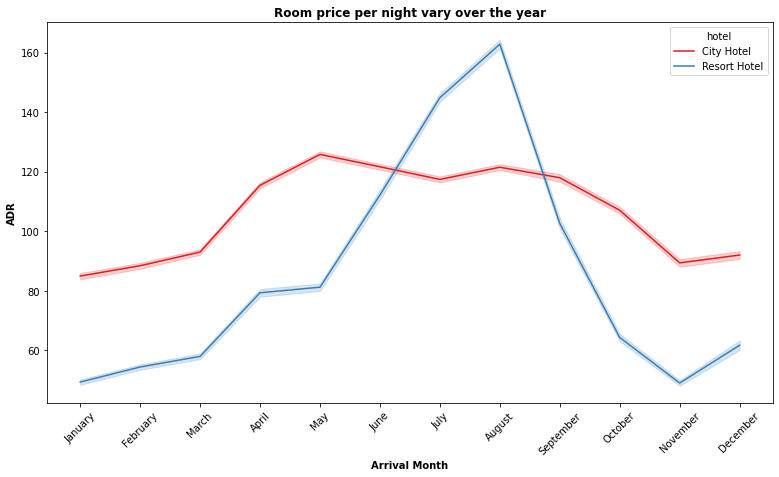

In [54]:
#  plot the line graph of seaborn library to represent adr monthly for each hotel type
#  x and y are columns to be plot on graph 
#  data is name of dataframe 
#  hue parameter represents which column in the data frame, you want to use for color encoding.
#  palette parameter is used for different color patterns
#  hue_order represents the order of hotel shown by bars

sns.lineplot(x = "arrival_date_month", y="adr", hue="hotel", data=hotel_booking_df, hue_order = ["City Hotel", "Resort Hotel"],palette= 'Set1')
plt.title("Room price per night vary over the year", weight = 'bold') #  set the title of graph
plt.xlabel("Arrival Month" , weight='bold')  #  label at x-axis with font style as bold
plt.xticks(rotation=45)  # rotate the x-axis label by 45 degree angle
plt.ylabel("ADR" , weight='bold')   #  label at y-axis with font style as bold

#  to show a graph.It is necessary when you are using Matplotlib in terminal and optional when you are using notebook
plt.show()

# Conclusion drawn

*  For Resort hotel, the price per night (ADR) is more expensive during July and August.

*   For City hotel, the price per night (ADR) is more expensive during May , June and July. 




# 7. What is the percentage of booking for each year?

In [55]:
#  create a new dataframe to show the percentage of bookings for each year
#  new df is created by pd.DataFrame() and columns will have list of columns name for new df.
#  value_counts() method is used to count the total bookings yearly 

each_year_bookings = pd.DataFrame(hotel_booking_df['arrival_date_year'].value_counts().reset_index().values, columns=["year", "booking_count"])
each_year_bookings

,year,booking_count
0,2016,40238
1,2017,28684
2,2015,12843


In [56]:
#  sort new df yearly to represnt in graph
#  sort_values() is used to sort data according to a column 

each_year_bookings = each_year_bookings.sort_values(by='year', ascending=True)

#  calculating percentage for each year bookings 
#  sum() method is used to find the sum of column "booking_count" to calculate the total bookings
#  round() method is used to get percentage upto two decimal places

each_year_bookings['bookings_percent'] =  round((100 * each_year_bookings['booking_count'] / sum(each_year_bookings['booking_count'])) , 2)
each_year_bookings

,year,booking_count,bookings_percent
2,2015,12843,15.71
0,2016,40238,49.21
1,2017,28684,35.08


Text(0, 0.5, 'Year')

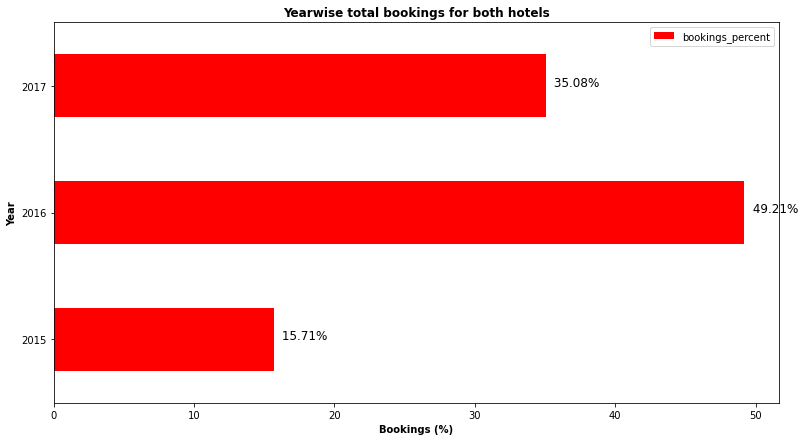

In [57]:
#  plot the horizontal bar graph to represent yearly data
#  plot() is a df method to plot a graph and "barh" is used to make horizontal bar graph
#  color is parameter to represent the color of each bar 

plots = each_year_bookings.plot.barh(x='year', y='bookings_percent',color='red')

#  below is the code to annotate bars i.e. write values on top of each bar 

#  Iterrating over the bars one-by-one
for bar in plots.patches:
   
  #  Using Matplotlib's annotate function and
  #  passing the coordinates where the annotation shall be done
  #  Annotation means adding notes to a diagram stating what values do it represents. 
  #  It often gets tiresome for the user to read the values from the graph when the graph is scaled down 
  #  or is overly populated
  #  x-coordinate: bar.get_y() + bar.get_width() 
  #  y-coordinate: bar.get_width()
 
   
    plots.text(
        bar.get_width() + 0.3, 
        bar.get_y() + 0.25,
        " {:,}".format(bar.get_width()) + '%', 
        fontsize=12 )
        
plt.title("Yearwise total bookings for both hotels" , weight="bold")  #  set the title of a graph
plt.xlabel("Bookings (%)" , weight='bold')  #  set label at x-axis having "bold" as font style
plt.ylabel("Year" , weight="bold")  #  set label at y-axis having "bold" as font style

# Conclusion drawn:

*   In year 2015, total booking is approximately 15.63 %
*   In year 2016, total booking is approximately 49.21 %
*   In year 2017, total booking is approximately 35.17 %



# 8. What is the Effect of Meal type on Cancellations?

In [58]:
#  apply groupby on "meal" column to see the total count for cancelled and non-cancelled bookings that have effect on meal type 
hotel_booking_df.groupby('meal')['is_canceled'].value_counts(normalize = True)

meal       is_canceled
BB         0              0.744335
           1              0.255665
FB         0              0.746479
           1              0.253521
HB         0              0.748889
           1              0.251111
SC         0              0.651086
           1              0.348914
Undefined  0              0.859410
           1              0.140590
Name: is_canceled, dtype: float64

Text(0, 0.5, 'Reservation Count')

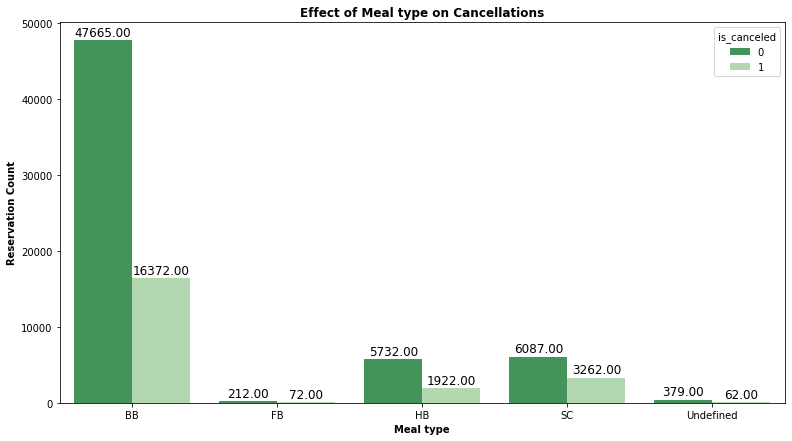

In [59]:
#  plot countplot of seaborn library to represent mael type data on cancel bookings
plots = sns.countplot(x= 'meal',hue = 'is_canceled',data = hotel_booking_df,palette= 'Greens_r')

# below is the code to annotate bars i.e. write values on top of each bar 

# Iterrating over the bars one-by-one
for bar in plots.patches:
   
  #  Using Matplotlib's annotate function and
  #  passing the coordinates where the annotation shall be done
  #  Annotation means adding notes to a diagram stating what values do it represents. 
  #  It often gets tiresome for the user to read the values from the graph when the graph is scaled down 
  #  or is overly populated
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
  
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')
    
plt.title ('Effect of Meal type on Cancellations',weight = 'bold')  #  set the title of a graph
plt.xlabel("Meal type" ,weight = 'bold')  #  set label on x-axis having font style as bold
plt.ylabel('Reservation Count' , weight = 'bold')  # set label on y-axis having font style as bold

# Conclusion drawn:

* From the graph, we can depict that more number of cancellation are for BB(Bed and breakfast) meal type.

* Approximately 25 % of BB(bed and breakfast) meal were cancelled by the guest.

* Approximately 14 % of undefined/SC(no meal package) were cancelled.




#Heat map for all colulmns to show relationship between columns:

In [60]:
#  heatmap for the entire dataset
#  Finding the relation between the variables 
#  corr() is a dataframe method to find the correlation between variables 
corr_relation =hotel_booking_df.corr()
corr_relation

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,total_nights_stay
is_canceled,1.000000,0.176729,0.082396,-0.002207,0.005598,0.058686,0.082254,0.087113,0.057455,-0.018444,-0.089585,0.047348,-0.050556,-0.088465,0.000843,0.137465,-0.177899,-0.113633,0.083378
lead_time,0.176729,1.000000,0.128865,0.095027,0.014564,0.253777,0.326027,0.182864,0.039704,-0.001351,-0.161972,0.000308,-0.083474,0.065308,0.115320,0.072362,-0.086655,0.054836,0.338442
arrival_date_year,0.082396,0.128865,1.000000,-0.527254,-0.012520,-0.002293,-0.006246,0.050252,0.015078,-0.023061,0.029283,-0.046644,0.031732,0.003909,-0.029138,0.164611,-0.039592,0.054335,-0.005518
arrival_date_week_number,-0.002207,0.095027,-0.527254,1.000000,0.093066,0.025441,0.023436,0.019569,0.005332,0.013300,-0.036866,0.004064,-0.020394,0.006467,0.002257,0.097148,0.005140,0.047889,0.027037
arrival_date_day_of_month,0.005598,0.014564,-0.012520,0.093066,1.000000,-0.014809,-0.025748,0.001975,0.014361,-0.001370,-0.005061,-0.008811,0.000434,0.006962,0.004848,0.018363,0.008159,-0.003354,-0.024760
stays_in_weekend_nights,0.058686,0.253777,-0.002293,0.025441,-0.014809,1.000000,0.540513,0.102547,0.024749,0.014029,-0.111691,-0.019914,-0.054999,0.051481,-0.036778,0.033700,-0.044879,0.029046,0.779001
stays_in_week_nights,0.082254,0.326027,-0.006246,0.023436,-0.025748,0.540513,1.000000,0.113265,0.027274,0.016115,-0.117790,-0.016796,-0.057386,0.085868,0.001684,0.048303,-0.046715,0.034770,0.948597
adults,0.087113,0.182864,0.050252,0.019569,0.001975,0.102547,0.113265,1.000000,0.016221,0.021200,-0.217422,-0.050192,-0.146613,-0.063129,-0.021493,0.334797,0.007784,0.145541,0.122988
children,0.057455,0.039704,0.015078,0.005332,0.014361,0.024749,0.027274,0.016221,1.000000,0.018587,-0.043428,-0.016859,-0.026975,0.033911,-0.017473,0.260876,0.030154,0.050781,0.029637
babies,-0.018444,-0.001351,-0.023061,0.013300,-0.001370,0.014029,0.016115,0.021200,0.018587,1.000000,-0.012734,-0.004879,-0.008860,0.079294,-0.006486,0.017785,0.027620,0.093147,0.017287


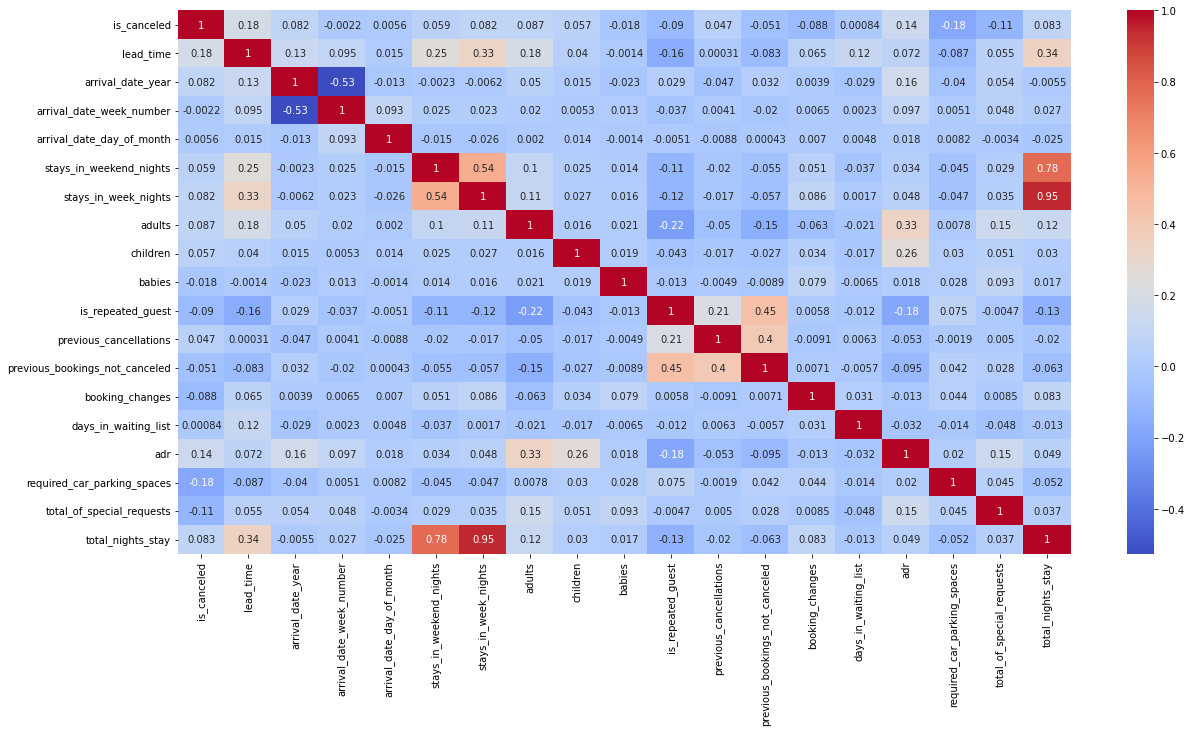

In [61]:
# plot heatmap for whole dataset
plt.figure(figsize=(20,10))
sns.heatmap(corr_relation, cmap= "coolwarm" , annot=True) 

# Insights :-


1. 
* More than 60 % of the population booked the City hotel.

2. 
* After analyzing the monthwise bookings for both hotels.We learnt that most of the bookings were made from July to August. And the least bookings were made at the start and end of the year.

3. 
* Almost 25% of the bookings were cancelled.Number of bookings cancelled in City hotel is more as compared to Resort hotel.

* In order to minimize the cancellation, the hotel must keep an eye on the pricing of the hotel stays on other channels, including OTAs(Online travelling agency) that the hotels are not partnering with. This is to ensure that their customers don’t jump to re-booking their hotel rooms on other channels at lower prices.

4.  
* Bookings via Online TA are more as compared to other market segments like offline.  
* Hotel can increase their bookings via offline by direct interaction with the customer over phone calls and emails. If they directly get booking from customers then it saves their OTAs(Online travelling agency) commission.Answering queries quickly and comprehensively will also help their guests to feel good. Their interactions with your hotel, in turn helping to boost your reputation.

5. 
* Couple is the most popular accomdation type having highest number of bookings. 

* Hotel can make arrangements accordingly which are best suited for couples.

6. 
We have seen that the duration of stay in nights by guest is:
* For Resort hotel, the average duration of stay is 3-7 days.
* For City hotel, the average duration of stay is 1-4 days

7. 
* After analysing three years of hotel booking data,We have learnt that bookings has jumped to more than 300% in year 2016 as compare to 2015. 
And there is drop in bookings by 30% in year 2017 as compare to 2016 figures.

* Hotel may use some strategies to increase his bookings every year .They can offer discounts and figure out when things are busy, steady, and slow and then adjust their prices accordingly.

8. 
* Families (with kids) is the least accomodation type.

9. 
* After analyzing the effect of cancellation  on meal type ,We can say that BB(Bed and Breakfast) meal type is the most affected meal which is cancelled by guest.

10. 
* After analysing the ADR(Price per night) for both hotel,We have drawn the conclusion that ADR is expensive in between the May-August.These months have highest booking and it could be reason for high ADR during this period.

* Hotel can reduce ADR to attract more guest and increase the number of bookings during this period.
